<a href="https://colab.research.google.com/github/Diogoa83/Inteligencia-de-Mercado/blob/main/Convenio_OUTROS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mplcyberpunk
!pip install python-bcb

In [2]:
import mplcyberpunk
import seaborn as sns
import pandas as pd
from bcb import sgs
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.dates as mdates
from matplotlib.dates import date2num
from datetime import datetime
from datetime import timedelta
plt.style.use("cyberpunk")

In [3]:
import numpy as np
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot
import pandas.util.testing as tm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot

<ipython-input-3-533cb06baa56>:4: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
df_outros = pd.read_csv('/content/drive/MyDrive/Dados/convenio_OUTROS.csv', sep=';')
df_outros['Data'] = pd.to_datetime(df_outros['Data'], format='%d/%m/%Y')

In [5]:
df_outros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Data       31 non-null     datetime64[ns]
 1   ValorBase  31 non-null     object        
dtypes: datetime64[ns](1), object(1)
memory usage: 624.0+ bytes


In [6]:
# Remover vírgula e converter coluna para float
df_outros['ValorBase'] = df_outros['ValorBase'].str.replace(',', '.').astype(float)

In [7]:
df_outros.head(4)

,Data,ValorBase
0,2020-12-01,8000.00
1,2021-01-01,15521152.49
2,2021-02-01,10992876.72
3,2021-03-01,17470762.77


In [8]:
df_outros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Data       31 non-null     datetime64[ns]
 1   ValorBase  31 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 624.0 bytes


In [9]:
train_size = int(len(df_outros.ValorBase) * 2 / 3)
train_size

20

In [10]:
train_set = df_outros.ValorBase[:train_size]
test_set = df_outros.ValorBase[train_size:]

In [11]:
train_set.shape, test_set.shape

((20,), (11,))

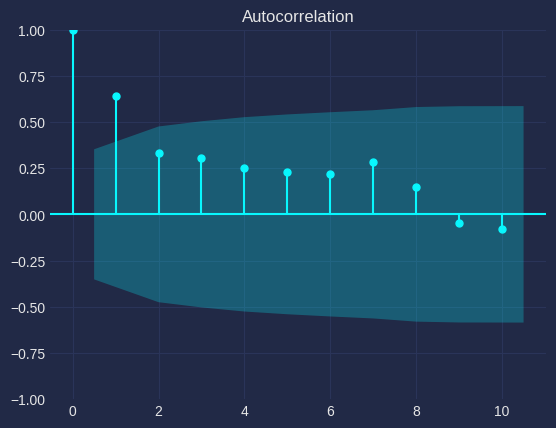

In [13]:
plot_acf(df_outros.ValorBase, lags=10)
pyplot.show()

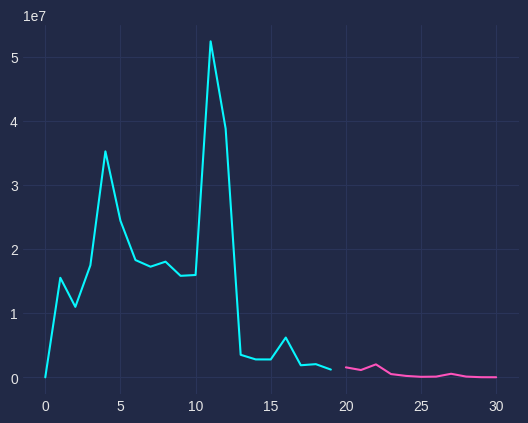

In [14]:
plt.plot(train_set)
plt.plot(test_set)

In [26]:
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.ar_model import AutoReg

ar_2 = AutoReg(train_set, lags=2).fit()
ar_2.params

const           8.326577e+06
ValorBase.L1    7.382466e-01
ValorBase.L2   -4.321113e-01
ValorBase.L3    1.741704e-01
dtype: float64

In [29]:
previsoes = ar_2.params[0] + test_set.shift(2) * ar_2.params[1] + test_set.shift(1) * ar_2.params[1]

In [ ]:
plt.plot(train_set)
plt.plot(test_set)
plt.plot(previsoes)

In [33]:
previsoes = ar_2.params[0]
for i, param in enumerate(ar_2.params[1:]):
    previsoes += test_set.shift(i + 1) * param
previsoes

20             NaN
21             NaN
22             NaN
23    9.601722e+06
24    8.032558e+06
25    8.626041e+06
26    8.382648e+06
27    8.415264e+06
28    8.707852e+06
29    8.194691e+06
30    8.392930e+06
Name: ValorBase, dtype: float64

In [23]:
((test_set - previsoes) ** 2).mean()

22507063671950.11